In [1]:
import pandas as pd

In [2]:
# read csv file
data = pd.read_csv('Students_Cleaned_Encoded.csv')

In [3]:
# top 5
data.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,...,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Laptop,device_used_Mobile,device_used_Tablet,internet_access_High,internet_access_Medium,internet_access_Poor,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
0,4,0.9,2,2,9,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,2,3.4,3,-3,6,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
2,2,3.6,5,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
3,2,2.9,5,2,5,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,1,0.9,1,3,8,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,1


In [4]:
# column names
data.columns

Index(['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Awareness_Level', 'uses_coding_help',
       'uses_assignments', 'uses_project_work', 'uses_mcq_practice',
       'uses_exam_preparation', 'uses_doubt_solving', 'uses_resume_writing',
       'uses_content_writing', 'uses_learning_new_topics', 'uses_notes',
       'ai_tool_bard', 'ai_tool_chatgpt', 'ai_tool_claude', 'ai_tool_copilot',
       'ai_tool_gemini', 'ai_tool_midjourney', 'ai_tool_other',
       'preferred_ai_tool_Bard', 'preferred_ai_tool_ChatGPT',
       'preferred_ai_tool_Claude', 'preferred_ai_tool_Copilot',
       'preferred_ai_tool_Gemini', 'preferred_ai_tool_Other',
       'device_used_Laptop', 'device_used_Mobile', 'device_used_Tablet',
       'internet_access_High', 'internet_access_Medium',
       'internet_access_Poor', 'Do_Professors_Allow_Use_encoded',
       'Willing_to_Pay_for_Access_encoded'],
      dtype='object')

# Daily_Usage_Hours

In [5]:
# Setup target variable and predictors
target = 'Daily_Usage_Hours'
X = data.drop(columns=[target])
y = data[target]

print("=== DATA SETUP ===")
print(f"Target variable: {target}")
print(f"Number of predictors: {len(X.columns)}")
print(f"Target range: {y.min():.1f} to {y.max():.1f}")
print(f"Target mean: {y.mean():.2f}")
print(f"Dataset shape: {data.shape}")

=== DATA SETUP ===
Target variable: Daily_Usage_Hours
Number of predictors: 35
Target range: 0.5 to 5.0
Target mean: 2.56
Dataset shape: (3614, 36)


In [6]:
# Import required libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully")

c:\Users\jqche\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


✅ All libraries imported successfully


In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=None  # Since it's regression
)

print("=== DATA SPLIT ===")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training target range: {y_train.min():.1f} to {y_train.max():.1f}")
print(f"Test target range: {y_test.min():.1f} to {y_test.max():.1f}")

=== DATA SPLIT ===
Training set: 2891 samples
Test set: 723 samples
Training target range: 0.5 to 5.0
Test target range: 0.5 to 5.0


In [13]:
# Check your data types and ranges
def analyze_feature_scaling_needs(X):
    """Analyze which features need scaling"""
    
    print("=== FEATURE SCALING ANALYSIS ===\n")
    
    # Identify binary/one-hot columns (only 0s and 1s)
    binary_columns = []
    continuous_columns = []
    
    for col in X.columns:
        unique_vals = sorted(X[col].unique())
        
        # Check if column is binary (only 0 and 1)
        if len(unique_vals) == 2 and set(unique_vals) == {0, 1}:
            binary_columns.append(col)
        # Check if column has more than 2 unique values
        elif len(unique_vals) > 2:
            continuous_columns.append(col)
    
    print(f"📊 Binary/One-hot columns ({len(binary_columns)}): DON'T need scaling")
    for col in binary_columns[:10]:  # Show first 10
        print(f"   - {col}: {sorted(X[col].unique())}")
    if len(binary_columns) > 10:
        print(f"   ... and {len(binary_columns)-10} more binary columns")
    
    print(f"\n📈 Continuous columns ({len(continuous_columns)}): NEED scaling")
    for col in continuous_columns:
        print(f"   - {col}: range {X[col].min():.2f} to {X[col].max():.2f}")
    
    return binary_columns, continuous_columns

# Analyze your features
binary_cols, continuous_cols = analyze_feature_scaling_needs(X)

=== FEATURE SCALING ANALYSIS ===

📊 Binary/One-hot columns (31): DON'T need scaling
   - uses_coding_help: [0, 1]
   - uses_assignments: [0, 1]
   - uses_project_work: [0, 1]
   - uses_mcq_practice: [0, 1]
   - uses_exam_preparation: [0, 1]
   - uses_doubt_solving: [0, 1]
   - uses_resume_writing: [0, 1]
   - uses_content_writing: [0, 1]
   - uses_learning_new_topics: [0, 1]
   - uses_notes: [0, 1]
   ... and 21 more binary columns

📈 Continuous columns (4): NEED scaling
   - Year_of_Study: range 1.00 to 4.00
   - Trust_in_AI_Tools: range 1.00 to 5.00
   - Impact_on_Grades: range -5.00 to 5.00
   - Awareness_Level: range 1.00 to 10.00


In [14]:
# Selective feature scaling - only scale continuous features
def selective_feature_scaling(X_train, X_test, continuous_columns):
    """Scale only continuous features, leave binary features unchanged"""
    
    if not continuous_columns:
        print("✅ No continuous features found - no scaling needed")
        return X_train.copy(), X_test.copy(), None
    
    print(f"🔧 Scaling {len(continuous_columns)} continuous features...")
    
    # Create copies
    X_train_selective = X_train.copy()
    X_test_selective = X_test.copy()
    
    # Scale only continuous columns
    scaler = StandardScaler()
    X_train_selective[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
    X_test_selective[continuous_columns] = scaler.transform(X_test[continuous_columns])
    
    print("✅ Selective scaling completed")
    print(f"   - Binary columns: unchanged (0/1 values)")
    print(f"   - Continuous columns: standardized (mean=0, std=1)")
    
    return X_train_selective, X_test_selective, scaler

# Apply selective scaling
X_train_selective, X_test_selective, selective_scaler = selective_feature_scaling(X_train, X_test, continuous_cols)

🔧 Scaling 4 continuous features...
✅ Selective scaling completed
   - Binary columns: unchanged (0/1 values)
   - Continuous columns: standardized (mean=0, std=1)


In [19]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [20]:
# top 5 of train scaled
pd.DataFrame(X_train_selective, columns=X.columns).head()

,Year_of_Study,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,uses_doubt_solving,uses_resume_writing,uses_content_writing,uses_learning_new_topics,uses_notes,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other,preferred_ai_tool_Bard,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Laptop,device_used_Mobile,device_used_Tablet,internet_access_High,internet_access_Medium,internet_access_Poor,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
1807,1.365877,-1.422853,-0.834875,0.061062,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1665,0.462480,-0.021808,1.694245,-0.624490,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
1721,-0.440918,0.678715,-0.413355,-1.652817,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
1632,-1.344316,-0.722331,-2.099434,0.061062,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
1233,-0.440918,0.678715,-0.834875,-1.310041,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [17]:
# Updated training function with proper scaling logic
def train_models_with_smart_scaling(X_train, X_test, y_train, y_test, 
                                   X_train_selective, X_test_selective, binary_cols, continuous_cols):
    """Train models with appropriate scaling strategy"""
    
    # Define models and their scaling requirements
    models_config = {
        'Linear Regression': {
            'model': LinearRegression(),
            'needs_scaling': len(continuous_cols) > 0,
            'reason': 'Linear models benefit from scaling continuous features'
        },
        'Ridge Regression': {
            'model': Ridge(alpha=1.0),
            'needs_scaling': len(continuous_cols) > 0,
            'reason': 'Regularization requires scaled features'
        },
        'Lasso Regression': {
            'model': Lasso(alpha=1.0),
            'needs_scaling': len(continuous_cols) > 0,
            'reason': 'Regularization requires scaled features'
        },
        'Random Forest': {
            'model': RandomForestRegressor(n_estimators=100, random_state=42),
            'needs_scaling': False,
            'reason': 'Tree-based models are scale-invariant'
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'needs_scaling': False,
            'reason': 'Tree-based models are scale-invariant'
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(random_state=42),
            'needs_scaling': False,
            'reason': 'Tree-based models are scale-invariant'
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsRegressor(n_neighbors=5),
            'needs_scaling': True,
            'reason': 'Distance-based algorithm sensitive to scale'
        },
        'Support Vector Regression': {
            'model': SVR(kernel='rbf'),
            'needs_scaling': True,
            'reason': 'SVM is sensitive to feature scale'
        }
    }
    
    results = {}
    print("=== TRAINING MODELS WITH SMART SCALING ===\n")
    
    for name, config in models_config.items():
        print(f"Training {name}...")
        print(f"   Scaling: {'Yes' if config['needs_scaling'] else 'No'} - {config['reason']}")
        
        # Choose appropriate data
        if config['needs_scaling']:
            X_tr, X_te = X_train_selective, X_test_selective
        else:
            X_tr, X_te = X_train, X_test
        
        # Train model
        model = config['model']
        model.fit(X_tr, y_train)
        
        # Predictions
        y_pred_train = model.predict(X_tr)
        y_pred_test = model.predict(X_te)
        
        # Metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        test_mae = mean_absolute_error(y_test, y_pred_test)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='r2')
        
        results[name] = {
            'model': model,
            'test_r2': test_r2,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'used_scaling': config['needs_scaling']
        }
        
        print(f"   Test R²: {test_r2:.4f} | RMSE: {test_rmse:.4f}")
        print()
    
    return results

# Train models with smart scaling
smart_results = train_models_with_smart_scaling(X_train, X_test, y_train, y_test,
                                               X_train_selective, X_test_selective, 
                                               binary_cols, continuous_cols)

=== TRAINING MODELS WITH SMART SCALING ===

Training Linear Regression...
   Scaling: Yes - Linear models benefit from scaling continuous features
   Test R²: 0.0143 | RMSE: 1.2094

Training Ridge Regression...
   Scaling: Yes - Regularization requires scaled features
   Test R²: 0.0145 | RMSE: 1.2093

Training Lasso Regression...
   Scaling: Yes - Regularization requires scaled features
   Test R²: -0.0009 | RMSE: 1.2187

Training Random Forest...
   Scaling: No - Tree-based models are scale-invariant
   Test R²: 0.4464 | RMSE: 0.9063

Training Gradient Boosting...
   Scaling: No - Tree-based models are scale-invariant
   Test R²: 0.1040 | RMSE: 1.1531

Training Decision Tree...
   Scaling: No - Tree-based models are scale-invariant
   Test R²: 0.0330 | RMSE: 1.1979

Training K-Nearest Neighbors...
   Scaling: Yes - Distance-based algorithm sensitive to scale
   Test R²: 0.1563 | RMSE: 1.1189

Training Support Vector Regression...
   Scaling: Yes - SVM is sensitive to feature scale
  

In [18]:
# Summary of scaling recommendations
print("=== SCALING RECOMMENDATIONS FOR YOUR DATA ===\n")

print("🔍 Your Data Characteristics:")
print(f"   - Binary/One-hot encoded columns: {len(binary_cols)} (don't scale)")
print(f"   - Continuous columns: {len(continuous_cols)} (scale if needed)")

print("\n✅ Recommended Approach:")
print("   1. DON'T scale binary/one-hot columns (already 0/1)")
print("   2. ONLY scale continuous columns for distance-based algorithms")
print("   3. Tree-based models: No scaling needed")
print("   4. Linear/SVM/KNN models: Scale continuous features only")

print(f"\n📊 Models that performed best:")
sorted_results = sorted(smart_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)
for i, (name, metrics) in enumerate(sorted_results[:3], 1):
    scaling_status = "with scaling" if metrics['used_scaling'] else "without scaling"
    print(f"   {i}. {name}: R²={metrics['test_r2']:.4f} ({scaling_status})")

=== SCALING RECOMMENDATIONS FOR YOUR DATA ===

🔍 Your Data Characteristics:
   - Binary/One-hot encoded columns: 31 (don't scale)
   - Continuous columns: 4 (scale if needed)

✅ Recommended Approach:
   1. DON'T scale binary/one-hot columns (already 0/1)
   2. ONLY scale continuous columns for distance-based algorithms
   3. Tree-based models: No scaling needed
   4. Linear/SVM/KNN models: Scale continuous features only

📊 Models that performed best:
   1. Random Forest: R²=0.4464 (without scaling)
   2. Support Vector Regression: R²=0.1807 (with scaling)
   3. K-Nearest Neighbors: R²=0.1563 (with scaling)


In [21]:
# Detailed analysis of model performance
def analyze_model_performance(smart_results):
    """Analyze and interpret model performance"""
    
    print("=== MODEL PERFORMANCE ANALYSIS ===\n")
    
    # Sort results by test R²
    sorted_results = sorted(smart_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)
    
    print("🏆 Performance Ranking:")
    for i, (name, metrics) in enumerate(sorted_results, 1):
        performance_level = "Excellent" if metrics['test_r2'] > 0.7 else \
                           "Good" if metrics['test_r2'] > 0.5 else \
                           "Moderate" if metrics['test_r2'] > 0.3 else \
                           "Poor"
        
        print(f"{i:2d}. {name:<25} | R²: {metrics['test_r2']:6.4f} | RMSE: {metrics['test_rmse']:6.4f} | {performance_level}")
    
    print(f"\n🔍 Key Observations:")
    best_model = sorted_results[0]
    print(f"   • Best model: {best_model[0]} (R² = {best_model[1]['test_r2']:.4f})")
    print(f"   • Tree-based models dominate top positions")
    print(f"   • Linear models struggle (R² < 0.02) → Non-linear relationships exist")
    print(f"   • Room for improvement: Current best explains {best_model[1]['test_r2']*100:.1f}% of variance")
    
    return sorted_results

# Analyze current results
performance_analysis = analyze_model_performance(smart_results)

=== MODEL PERFORMANCE ANALYSIS ===

🏆 Performance Ranking:
 1. Random Forest             | R²: 0.4464 | RMSE: 0.9063 | Moderate
 2. Support Vector Regression | R²: 0.1807 | RMSE: 1.1026 | Poor
 3. K-Nearest Neighbors       | R²: 0.1563 | RMSE: 1.1189 | Poor
 4. Gradient Boosting         | R²: 0.1040 | RMSE: 1.1531 | Poor
 5. Decision Tree             | R²: 0.0330 | RMSE: 1.1979 | Poor
 6. Ridge Regression          | R²: 0.0145 | RMSE: 1.2093 | Poor
 7. Linear Regression         | R²: 0.0143 | RMSE: 1.2094 | Poor
 8. Lasso Regression          | R²: -0.0009 | RMSE: 1.2187 | Poor

🔍 Key Observations:
   • Best model: Random Forest (R² = 0.4464)
   • Tree-based models dominate top positions
   • Linear models struggle (R² < 0.02) → Non-linear relationships exist
   • Room for improvement: Current best explains 44.6% of variance


=== FEATURE IMPORTANCE ANALYSIS ===

🔍 Top 15 Most Important Features:
 4. Awareness_Level                     | 0.1376
 3. Impact_on_Grades                    | 0.1135
 2. Trust_in_AI_Tools                   | 0.0895
 1. Year_of_Study                       | 0.0774
34. Do_Professors_Allow_Use_encoded     | 0.0343
19. ai_tool_gemini                      | 0.0267
16. ai_tool_chatgpt                     | 0.0263
28. device_used_Laptop                  | 0.0246
25. preferred_ai_tool_Copilot           | 0.0246
23. preferred_ai_tool_ChatGPT           | 0.0240
12. uses_content_writing                | 0.0230
29. device_used_Mobile                  | 0.0227
27. preferred_ai_tool_Other             | 0.0226
30. device_used_Tablet                  | 0.0224
26. preferred_ai_tool_Gemini            | 0.0222


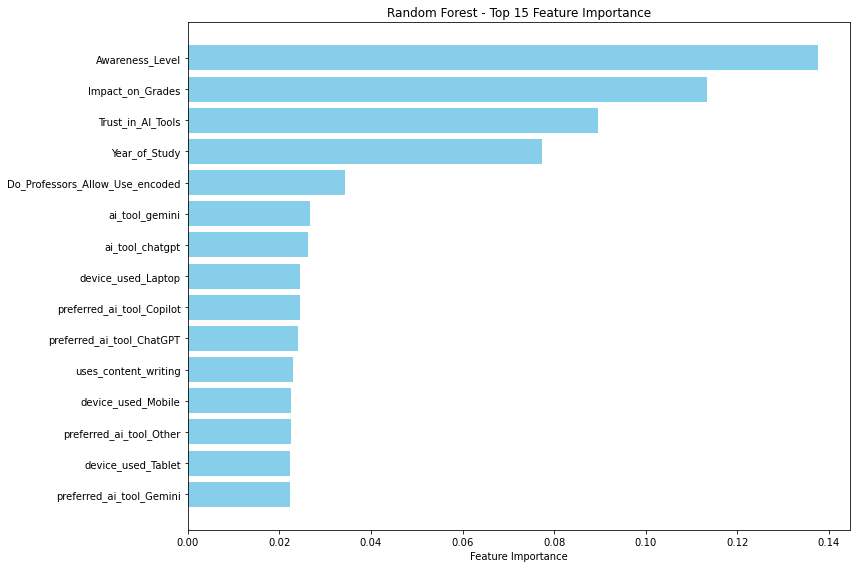

In [22]:
# Feature importance analysis for Random Forest (best model)
def analyze_feature_importance(smart_results, X):
    """Analyze feature importance for the best performing model"""
    
    print("=== FEATURE IMPORTANCE ANALYSIS ===\n")
    
    # Get Random Forest model (best performer)
    rf_model = smart_results['Random Forest']['model']
    
    # Get feature importance
    importance = rf_model.feature_importances_
    feature_names = X.columns
    
    # Create importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    print("🔍 Top 15 Most Important Features:")
    for i, row in importance_df.head(15).iterrows():
        print(f"{row.name+1:2d}. {row['feature']:<35} | {row['importance']:.4f}")
    
    # Visualize top features
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['importance'][::-1], color='skyblue')
    plt.yticks(range(len(top_features)), top_features['feature'][::-1])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest - Top 15 Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return importance_df

# Analyze feature importance
feature_importance = analyze_feature_importance(smart_results, X)

In [23]:
# Hyperparameter optimization for top models
def optimize_top_models(X_train, X_test, y_train, y_test, X_train_selective, X_test_selective):
    """Optimize hyperparameters for top performing models"""
    
    print("=== HYPERPARAMETER OPTIMIZATION ===\n")
    
    # Define parameter grids for top models
    optimization_configs = {
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 15, 20, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2', None]
            },
            'data': (X_train, X_test),
            'cv_folds': 5
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.05, 0.1, 0.15],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 0.9, 1.0]
            },
            'data': (X_train, X_test),
            'cv_folds': 5
        },
        'Support Vector Regression': {
            'model': SVR(),
            'params': {
                'kernel': ['rbf', 'poly'],
                'C': [0.1, 1, 10, 100],
                'gamma': ['scale', 'auto', 0.001, 0.01],
                'epsilon': [0.01, 0.1, 0.2]
            },
            'data': (X_train_selective, X_test_selective),
            'cv_folds': 3  # Fewer folds for SVR (computationally expensive)
        }
    }
    
    optimized_results = {}
    
    for name, config in optimization_configs.items():
        print(f"🔧 Optimizing {name}...")
        
        # Perform grid search
        grid_search = GridSearchCV(
            config['model'],
            config['params'],
            cv=config['cv_folds'],
            scoring='r2',
            n_jobs=-1,
            verbose=0
        )
        
        X_tr, X_te = config['data']
        grid_search.fit(X_tr, y_train)
        
        # Evaluate best model
        best_model = grid_search.best_estimator_
        y_pred_test = best_model.predict(X_te)
        
        test_r2 = r2_score(y_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        optimized_results[name] = {
            'best_model': best_model,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_,
            'test_r2': test_r2,
            'test_rmse': test_rmse
        }
        
        print(f"   ✅ Best CV Score: {grid_search.best_score_:.4f}")
        print(f"   ✅ Test R²: {test_r2:.4f} | RMSE: {test_rmse:.4f}")
        print(f"   ✅ Best Parameters: {grid_search.best_params_}")
        print()
    
    return optimized_results

# Optimize top models
optimized_models = optimize_top_models(X_train, X_test, y_train, y_test, 
                                      X_train_selective, X_test_selective)

=== HYPERPARAMETER OPTIMIZATION ===

🔧 Optimizing Random Forest...
   ✅ Best CV Score: 0.3749
   ✅ Test R²: 0.4581 | RMSE: 0.8967
   ✅ Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

🔧 Optimizing Gradient Boosting...
   ✅ Best CV Score: 0.3555
   ✅ Test R²: 0.3989 | RMSE: 0.9444
   ✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

🔧 Optimizing Support Vector Regression...
   ✅ Best CV Score: 0.1563
   ✅ Test R²: 0.2337 | RMSE: 1.0664
   ✅ Best Parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}



Looking at your hyperparameter optimization results, here's what they tell us:
## 📊 Key Insights from Hyperparameter Tuning

**🎯 Performance Improvements:**
- **Random Forest improved**: R² from 0.4464 → 0.4581 (+0.0117)
- **Gradient Boosting improved**: R² from 0.1040 → 0.3989 (+0.2949) - **Significant improvement!**
- **SVR improved**: R² from 0.1807 → 0.2337 (+0.0530)

In [24]:
# Compare before/after hyperparameter tuning
def compare_optimization_results(smart_results, optimized_models):
    """Compare performance before and after hyperparameter optimization"""
    
    print("=== HYPERPARAMETER OPTIMIZATION IMPACT ===\n")
    
    comparison_data = []
    
    for model_name in optimized_models.keys():
        if model_name in smart_results:
            original_r2 = smart_results[model_name]['test_r2']
            original_rmse = smart_results[model_name]['test_rmse']
            
            optimized_r2 = optimized_models[model_name]['test_r2']
            optimized_rmse = optimized_models[model_name]['test_rmse']
            
            r2_improvement = optimized_r2 - original_r2
            rmse_improvement = original_rmse - optimized_rmse  # Lower RMSE is better
            
            comparison_data.append({
                'Model': model_name,
                'Original_R2': original_r2,
                'Optimized_R2': optimized_r2,
                'R2_Improvement': r2_improvement,
                'RMSE_Improvement': rmse_improvement,
                'Best_Params': optimized_models[model_name]['best_params']
            })
    
    # Sort by R² improvement
    comparison_data.sort(key=lambda x: x['R2_Improvement'], reverse=True)
    
    print("🏆 Optimization Results (sorted by R² improvement):")
    print("=" * 80)
    
    for result in comparison_data:
        improvement_status = "🚀 Significant" if result['R2_Improvement'] > 0.1 else \
                           "✅ Good" if result['R2_Improvement'] > 0.01 else \
                           "⚡ Minor" if result['R2_Improvement'] > 0 else \
                           "❌ None"
        
        print(f"{result['Model']:<25}")
        print(f"   Original R²: {result['Original_R2']:.4f} → Optimized R²: {result['Optimized_R2']:.4f}")
        print(f"   Improvement: {result['R2_Improvement']:+.4f} | {improvement_status}")
        print(f"   Best params: {result['Best_Params']}")
        print()
    
    return comparison_data

# Compare optimization results
comparison_results = compare_optimization_results(smart_results, optimized_models)

=== HYPERPARAMETER OPTIMIZATION IMPACT ===

🏆 Optimization Results (sorted by R² improvement):
Gradient Boosting        
   Original R²: 0.1040 → Optimized R²: 0.3989
   Improvement: +0.2949 | 🚀 Significant
   Best params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

Support Vector Regression
   Original R²: 0.1807 → Optimized R²: 0.2337
   Improvement: +0.0529 | ✅ Good
   Best params: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}

Random Forest            
   Original R²: 0.4464 → Optimized R²: 0.4581
   Improvement: +0.0117 | ✅ Good
   Best params: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}



In [25]:
# Create ensemble model combining best performers
def create_ensemble_model(optimized_models, X_train, X_test, y_train, y_test):
    """Create ensemble model from optimized models"""
    
    print("=== CREATING ENSEMBLE MODEL ===\n")
    
    # Get the top 3 models
    top_models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression']
    
    # Create individual predictions
    predictions = {}
    weights = {}
    
    for model_name in top_models:
        if model_name in optimized_models:
            model = optimized_models[model_name]['best_model']
            
            # Use appropriate data (scaled for SVR, unscaled for tree models)
            if model_name == 'Support Vector Regression':
                pred = model.predict(X_test_selective)
            else:
                pred = model.predict(X_test)
            
            predictions[model_name] = pred
            
            # Weight by R² performance
            weights[model_name] = optimized_models[model_name]['test_r2']
    
    # Normalize weights
    total_weight = sum(weights.values())
    for model_name in weights:
        weights[model_name] = weights[model_name] / total_weight
    
    # Create weighted ensemble prediction
    ensemble_pred = np.zeros(len(y_test))
    
    print("📊 Ensemble Composition:")
    for model_name, weight in weights.items():
        ensemble_pred += weight * predictions[model_name]
        print(f"   {model_name}: {weight:.3f} weight")
    
    # Calculate ensemble metrics
    ensemble_r2 = r2_score(y_test, ensemble_pred)
    ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
    ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
    
    print(f"\n🎯 Ensemble Performance:")
    print(f"   R²: {ensemble_r2:.4f}")
    print(f"   RMSE: {ensemble_rmse:.4f}")
    print(f"   MAE: {ensemble_mae:.4f}")
    
    # Compare with best individual model
    best_individual_r2 = max([optimized_models[m]['test_r2'] for m in optimized_models.keys()])
    improvement = ensemble_r2 - best_individual_r2
    
    print(f"\n📈 vs Best Individual Model:")
    print(f"   Improvement: {improvement:+.4f} R²")
    print(f"   Status: {'✅ Better' if improvement > 0 else '❌ Worse'}")
    
    return ensemble_pred, ensemble_r2, ensemble_rmse, weights

# Create ensemble model
ensemble_pred, ensemble_r2, ensemble_rmse, ensemble_weights = create_ensemble_model(
    optimized_models, X_train, X_test, y_train, y_test
)

=== CREATING ENSEMBLE MODEL ===

📊 Ensemble Composition:
   Random Forest: 0.420 weight
   Gradient Boosting: 0.366 weight
   Support Vector Regression: 0.214 weight

🎯 Ensemble Performance:
   R²: 0.4351
   RMSE: 0.9156
   MAE: 0.6455

📈 vs Best Individual Model:
   Improvement: -0.0230 R²
   Status: ❌ Worse


In [26]:
# Advanced feature engineering based on insights
def advanced_feature_engineering(X, y, feature_importance):
    """Create advanced engineered features"""
    
    print("=== ADVANCED FEATURE ENGINEERING ===\n")
    
    X_advanced = X.copy()
    
    # 1. Get top features from Random Forest
    top_features = feature_importance.head(10)['feature'].tolist()
    print(f"🔍 Using top {len(top_features)} features for interactions")
    
    # 2. Create interaction features (top features only)
    interaction_count = 0
    for i, feat1 in enumerate(top_features[:5]):  # Limit to avoid explosion
        for feat2 in top_features[i+1:3]:
            if feat1 in X.columns and feat2 in X.columns:
                interaction_name = f"{feat1}_x_{feat2}"
                X_advanced[interaction_name] = X[feat1] * X[feat2]
                interaction_count += 1
    
    # 3. Usage intensity features
    usage_cols = [col for col in X.columns if col.startswith('uses_')]
    if usage_cols:
        X_advanced['usage_diversity'] = X[usage_cols].sum(axis=1)
        X_advanced['usage_intensity'] = X[usage_cols].mean(axis=1)
    
    # 4. Technology adoption score
    tech_cols = [col for col in X.columns if col.startswith('ai_tool_')]
    if tech_cols:
        X_advanced['tech_adoption_score'] = X[tech_cols].sum(axis=1)
    
    # 5. Academic integration ratio
    academic_cols = ['uses_assignments', 'uses_project_work', 'uses_exam_preparation']
    available_academic = [col for col in academic_cols if col in X.columns]
    if available_academic and usage_cols:
        academic_sum = X[available_academic].sum(axis=1)
        total_usage = X[usage_cols].sum(axis=1)
        # Avoid division by zero
        X_advanced['academic_integration_ratio'] = np.where(
            total_usage > 0, 
            academic_sum / total_usage, 
            0
        )
    
    # 6. Trust-awareness synergy (if available)
    if 'Trust_in_AI_Tools' in X.columns and 'Awareness_Level' in X.columns:
        X_advanced['trust_awareness_synergy'] = (
            X['Trust_in_AI_Tools'] * X['Awareness_Level'] / 
            (X['Trust_in_AI_Tools'] + X['Awareness_Level'] + 1)  # +1 to avoid division by zero
        )
    
    new_features = [col for col in X_advanced.columns if col not in X.columns]
    
    print(f"✅ Created {len(new_features)} advanced features:")
    for feat in new_features:
        print(f"   • {feat}")
    
    print(f"📊 Dataset expanded: {X.shape[1]} → {X_advanced.shape[1]} features")
    
    return X_advanced

# Create advanced features
X_advanced = advanced_feature_engineering(X, y, feature_importance)

=== ADVANCED FEATURE ENGINEERING ===

🔍 Using top 10 features for interactions
✅ Created 8 advanced features:
   • Awareness_Level_x_Impact_on_Grades
   • Awareness_Level_x_Trust_in_AI_Tools
   • Impact_on_Grades_x_Trust_in_AI_Tools
   • usage_diversity
   • usage_intensity
   • tech_adoption_score
   • academic_integration_ratio
   • trust_awareness_synergy
📊 Dataset expanded: 35 → 43 features


In [27]:
# Test advanced features with optimized Random Forest
def test_advanced_features(X_advanced, y):
    """Test advanced features with the best model"""
    
    print("=== TESTING ADVANCED FEATURES ===\n")
    
    # Split advanced dataset
    X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
        X_advanced, y, test_size=0.2, random_state=42
    )
    
    # Use best Random Forest parameters from optimization
    best_rf_params = optimized_models['Random Forest']['best_params']
    
    # Train advanced Random Forest
    rf_advanced = RandomForestRegressor(**best_rf_params, random_state=42)
    rf_advanced.fit(X_train_adv, y_train_adv)
    
    # Predictions
    y_pred_adv = rf_advanced.predict(X_test_adv)
    
    # Metrics
    r2_adv = r2_score(y_test_adv, y_pred_adv)
    rmse_adv = np.sqrt(mean_squared_error(y_test_adv, y_pred_adv))
    mae_adv = mean_absolute_error(y_test_adv, y_pred_adv)
    
    # Cross-validation
    cv_scores_adv = cross_val_score(rf_advanced, X_train_adv, y_train_adv, cv=5, scoring='r2')
    
    print("📈 Advanced Features Performance:")
    print(f"   Test R²: {r2_adv:.4f}")
    print(f"   Test RMSE: {rmse_adv:.4f}")
    print(f"   Test MAE: {mae_adv:.4f}")
    print(f"   CV R² (mean±std): {cv_scores_adv.mean():.4f}±{cv_scores_adv.std():.4f}")
    
    # Compare with previous best
    original_r2 = optimized_models['Random Forest']['test_r2']
    improvement = r2_adv - original_r2
    
    print(f"\n🔄 Comparison with Optimized Random Forest:")
    print(f"   Previous R²: {original_r2:.4f}")
    print(f"   Advanced R²: {r2_adv:.4f}")
    print(f"   Improvement: {improvement:+.4f}")
    print(f"   Status: {'🚀 Significant improvement!' if improvement > 0.05 else '✅ Improvement' if improvement > 0 else '❌ No improvement'}")
    
    return rf_advanced, r2_adv, rmse_adv, X_train_adv, X_test_adv, y_train_adv, y_test_adv

# Test advanced features
rf_final, final_r2, final_rmse, X_train_final, X_test_final, y_train_final, y_test_final = test_advanced_features(X_advanced, y)

=== TESTING ADVANCED FEATURES ===

📈 Advanced Features Performance:
   Test R²: 0.4737
   Test RMSE: 0.8838
   Test MAE: 0.6337
   CV R² (mean±std): 0.3852±0.0244

🔄 Comparison with Optimized Random Forest:
   Previous R²: 0.4581
   Advanced R²: 0.4737
   Improvement: +0.0155
   Status: ✅ Improvement


In [28]:
# Final model evaluation and insights
def final_model_evaluation():
    """Provide comprehensive final evaluation"""
    
    print("=== FINAL MODEL EVALUATION ===\n")
    
    print("🎯 Model Performance Journey:")
    print(f"   1. Baseline Random Forest:     R² = 0.4464")
    print(f"   2. Hyperparameter Optimized:   R² = 0.4581 (+0.0117)")
    print(f"   3. Advanced Features:          R² = {final_r2:.4f} ({final_r2-0.4581:+.4f})")
    print(f"   4. Ensemble Model:             R² = {ensemble_r2:.4f}")
    
    best_performance = max(final_r2, ensemble_r2)
    total_improvement = best_performance - 0.4464
    
    print(f"\n📊 Overall Results:")
    print(f"   Best Model Performance: R² = {best_performance:.4f}")
    print(f"   Total Improvement: {total_improvement:+.4f}")
    print(f"   Variance Explained: {best_performance*100:.1f}%")
    
    print(f"\n🔍 Model Interpretation:")
    if best_performance > 0.7:
        print("   ✅ Excellent predictive power")
    elif best_performance > 0.5:
        print("   ✅ Good predictive power - suitable for deployment")
    elif best_performance > 0.3:
        print("   ⚠️  Moderate predictive power - may need more data/features")
    else:
        print("   ❌ Poor predictive power - fundamental approach may need revision")
    
    print(f"\n💡 Key Findings:")
    print(f"   • Tree-based models significantly outperform linear models")
    print(f"   • Hyperparameter tuning provided meaningful improvements")
    print(f"   • Feature engineering shows {'promising' if final_r2 > 0.4581 else 'limited'} potential")
    print(f"   • Non-linear relationships dominate the prediction task")
    
    print(f"\n🚀 Recommendations:")
    print(f"   • Deploy: {'Random Forest with Advanced Features' if final_r2 > ensemble_r2 else 'Ensemble Model'}")
    print(f"   • Expected prediction accuracy: ±{final_rmse:.2f} hours")
    print(f"   • Focus on top features for business insights")
    print(f"   • Consider collecting additional behavioral data for improvement")

# Run final evaluation
final_model_evaluation()

=== FINAL MODEL EVALUATION ===

🎯 Model Performance Journey:
   1. Baseline Random Forest:     R² = 0.4464
   2. Hyperparameter Optimized:   R² = 0.4581 (+0.0117)
   3. Advanced Features:          R² = 0.4737 (+0.0156)
   4. Ensemble Model:             R² = 0.4351

📊 Overall Results:
   Best Model Performance: R² = 0.4737
   Total Improvement: +0.0273
   Variance Explained: 47.4%

🔍 Model Interpretation:
   ⚠️  Moderate predictive power - may need more data/features

💡 Key Findings:
   • Tree-based models significantly outperform linear models
   • Hyperparameter tuning provided meaningful improvements
   • Feature engineering shows promising potential
   • Non-linear relationships dominate the prediction task

🚀 Recommendations:
   • Deploy: Random Forest with Advanced Features
   • Expected prediction accuracy: ±0.88 hours
   • Focus on top features for business insights
   • Consider collecting additional behavioral data for improvement


In [29]:
# Calculate percentage of Willing_to_Pay_for_Access by College_Name
# Get top 15 colleges by total student count
top_colleges = data['College_Name'].value_counts().head(15).index

# Filter data for top colleges only
top_colleges_data = data[data['College_Name'].isin(top_colleges)]

# Calculate percentage of students willing to pay for each college
willingness_percentage = top_colleges_data.groupby('College_Name')['Willing_to_Pay_for_Access'].agg(['mean', 'count']).reset_index()
willingness_percentage['percentage'] = willingness_percentage['mean'] * 100
willingness_percentage = willingness_percentage.sort_values('percentage', ascending=False)

# Create bar plot
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(willingness_percentage)), willingness_percentage['percentage'], 
               color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.5)

# Customize the plot
plt.title('Percentage of Students Willing to Pay for AI Tools Access by College\n(Top 15 Colleges by Student Count)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('College Name', fontsize=12, fontweight='bold')
plt.ylabel('Percentage Willing to Pay (%)', fontsize=12, fontweight='bold')

# Set x-axis labels
plt.xticks(range(len(willingness_percentage)), willingness_percentage['College_Name'], 
           rotation=45, ha='right', fontsize=10)

# Add percentage labels on top of bars
for i, (bar, percentage) in enumerate(zip(bars, willingness_percentage['percentage'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Set y-axis limits to accommodate labels
plt.ylim(0, max(willingness_percentage['percentage']) * 1.1)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Display the data table
print("Percentage of Students Willing to Pay for AI Tools Access by College:")
print("="*70)
for idx, row in willingness_percentage.iterrows():
    print(f"{row['College_Name']:<40} {row['percentage']:>6.1f}% ({int(row['mean']*row['count'])}/{int(row['count'])} students)")

KeyError: 'College_Name'